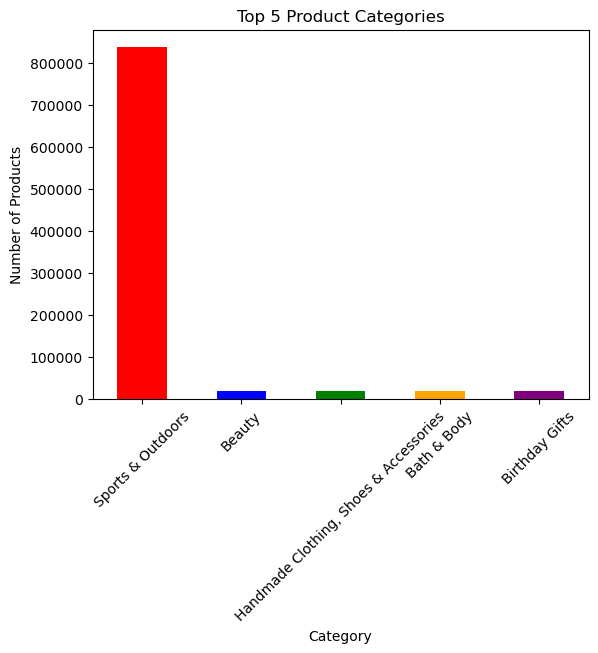

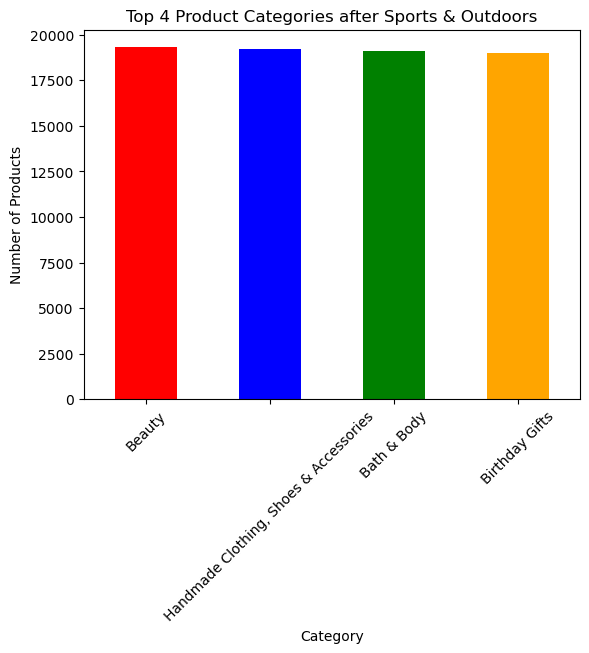

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline


# Load dataset
df = pd.read_csv('amz_uk_price_prediction_dataset.csv')

# Frequency table for categories
frq_tab = df['category'].value_counts().reset_index()
frq_tab.columns = ['category', 'count']  # two columns: category + count

# Top 5 categories
frq_tab_top5 = frq_tab.head(5)
frq_tab_top5_without_sports = frq_tab_top5[1:6]

# Plot
frq_tab_top5.plot(kind='bar', x='category', y='count', 
                   color=['red','blue','green','orange','purple'],legend=False)
plt.xlabel('Category')
plt.ylabel('Number of Products')
plt.title('Top 5 Product Categories')
plt.xticks(rotation=45)
plt.show()

# Top 4 categories after sports
frq_tab_top5_without_sports.plot(kind='bar', x='category', y='count', 
                   color=['red','blue','green','orange','purple'],legend=False )
plt.xlabel('Category')
plt.ylabel('Number of Products')
plt.title('Top 4 Product Categories after Sports & Outdoors')
plt.xticks(rotation=45)
plt.show()



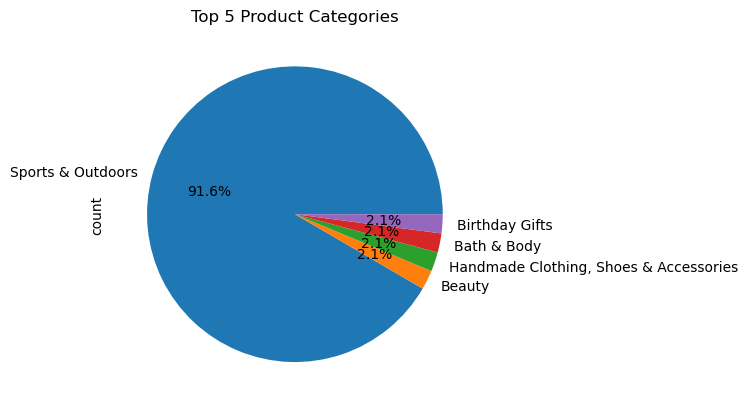

In [6]:

# For a subset of top categories, visualize their proportions using a pie chart. Does any category dominate the listings?
frq_tab_top5.plot(kind = 'pie', y='count', 
                  labels= frq_tab_top5['category'],
                  autopct = '%1.1f%%',
                  color=['red','blue','green','orange','purple'],legend=False)

plt.title('Top 5 Product Categories')
plt.show()

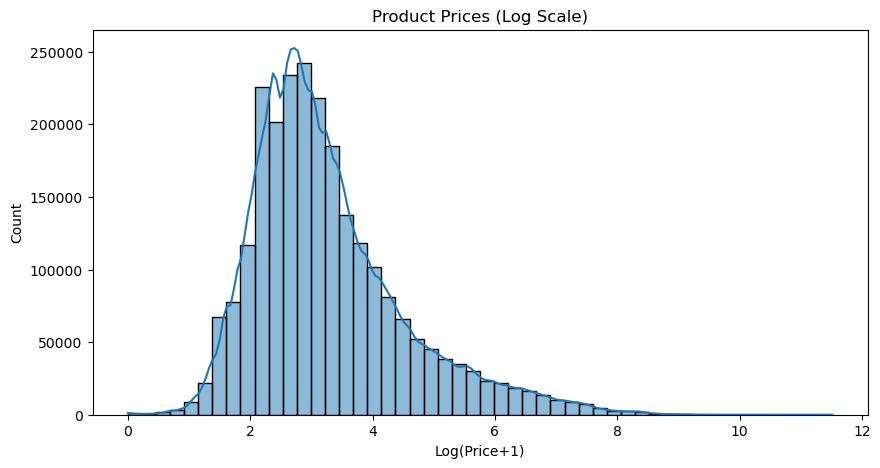

Variance: 119445.4853225653
Standard Deviation: 345.6088617535223
Range: 100000.0
Interquartile Range (IQR): 36.0


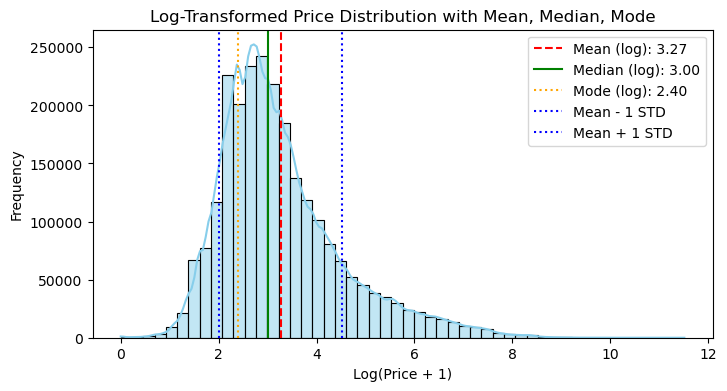

Total products: 2,443,651
90th percentile threshold: £149.99
Number of outliers (top 10%): 243,502


In [15]:
# Part 2: Delving into Product Pricing

# Business Question: How are products priced on Amazon UK, and are there specific price points or ranges that are more common?

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Histogram with log scale
plt.figure(figsize=(10,5))
sns.histplot(np.log1p(df['price']), bins=50, kde=True)  # log1p handles 0 safely
plt.title("Product Prices (Log Scale)")
plt.xlabel("Log(Price+1)")
plt.show()



# Variance
variance = df['price'].var()

# Standard Deviation
std_dev = df['price'].std()

# Range
price_range = df['price'].max() - df['price'].min()

# Interquartile Range (IQR)
Q1 = df['price'].quantile(0.25)  # 25th percentile
Q3 = df['price'].quantile(0.75)  # 75th percentile
IQR = Q3 - Q1

print("Variance:", variance)
print("Standard Deviation:", std_dev)
print("Range:", price_range)
print("Interquartile Range (IQR):", IQR)

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Log-transform prices (add 1 so log(0) doesn’t break)
log_price = np.log1p(df['price'])

# Recompute stats on log scale
log_mean = log_price.mean()
log_median = log_price.median()
log_mode = log_price.mode().iloc[0]
log_std = log_price.std()

plt.figure(figsize=(8,4))
sns.histplot(log_price, bins=50, kde=True, color='skyblue')

# Add vertical lines
plt.axvline(log_mean, color='red', linestyle='--', label=f'Mean (log): {log_mean:.2f}')
plt.axvline(log_median, color='green', linestyle='-', label=f'Median (log): {log_median:.2f}')
plt.axvline(log_mode, color='orange', linestyle=':', label=f'Mode (log): {log_mode:.2f}')
# Add standard deviation markers
plt.axvline(log_mean - log_std, color='blue', linestyle=':', label='Mean - 1 STD')
plt.axvline(log_mean + log_std, color='blue', linestyle=':', label='Mean + 1 STD')

plt.title('Log-Transformed Price Distribution with Mean, Median, Mode')
plt.xlabel('Log(Price + 1)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Measures of Centrality:
# Calculate the mean, median, and mode for the price of products.
# What's the average price point of products listed? How does this compare with the most common price point (mode)? - mode 9.99
## Most Amazon UK products fall in the £10–£90 range, but the catalog also contains rare outliers priced in the thousands.
# Measures of Dispersion:
# Determine the variance, standard deviation, range, and interquartile range for product price.

total_prods = df['price'].shape[0]
q90 = df['price'].quantile(0.90)

# Outliers = products above 90th percentile
outliers = df[df['price'] > q90]

print(f"Total products: {total_prods:,}")
print(f"90th percentile threshold: £{q90:.2f}")
print(f"Number of outliers (top 10%): {outliers.shape[0]:,}")

# How varied are the product prices? Are there any indicators of a significant spread in prices?
df_std = df['price'].std
# Visualizations:



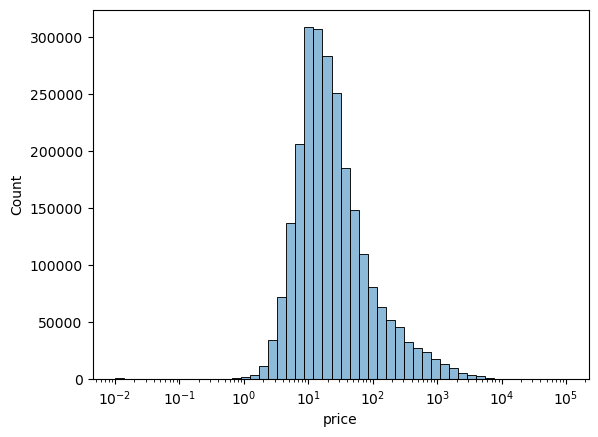

Q1:9.99, Q3:45.99, IQR:36.0


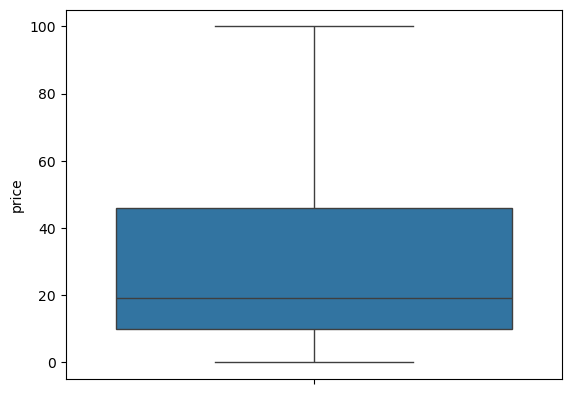

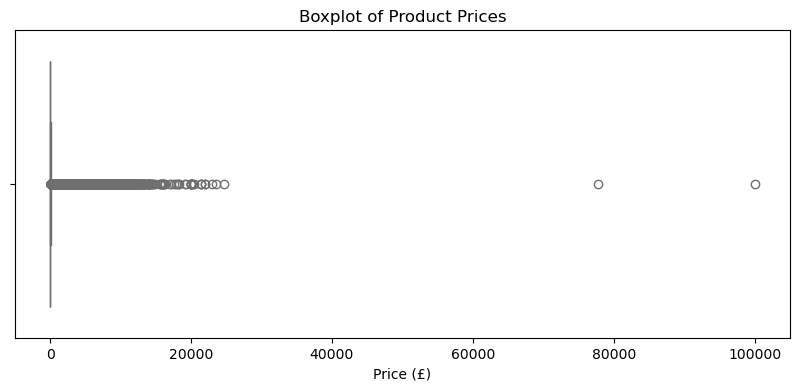

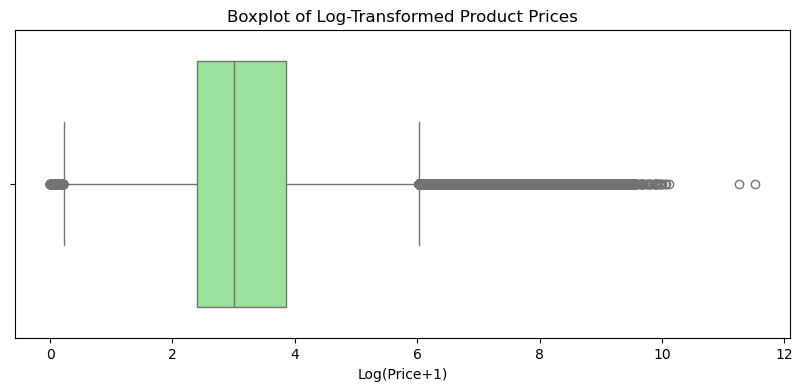

In [ ]:
# Is there a specific price range where most products fall? Plot a histogram to visualize the distribution of product prices. If its hard to read these diagrams, think why this is, and explain how it could be solved..
sns.histplot(data=df, x='price', bins=50, kde=True,log_scale=True)
plt.show()

Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
print (f'Q1:{Q1}, Q3:{Q3}, IQR:{IQR}')

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
# Are there products that are priced significantly higher than the rest? Use a box plot to showcase the spread and potential outliers in product pricing.

sns.boxplot (data=df, y='price')
plt.show()



import matplotlib.pyplot as plt

import seaborn as sns

plt.figure(figsize=(10,4))
sns.boxplot(x=df['price'], color="skyblue", showfliers=True)  # showfliers=True keeps the outliers visible
plt.title("Boxplot of Product Prices")
plt.xlabel("Price (£)")
plt.show()

#with log
plt.figure(figsize=(10,4))
sns.boxplot(x=np.log1p(df['price']), color="lightgreen", showfliers=True)
plt.title("Boxplot of Log-Transformed Product Prices")
plt.xlabel("Log(Price+1)")
plt.show()

In [8]:

# Part 3: Unpacking Product Ratings
# Business Question: How do customers rate products on Amazon UK, and are there any patterns or tendencies in the ratings?

# rate - patterns or tendencies
df.head()


# Measures of Centrality:

# Calculate the mean, median, and mode for the rating of products.
# How do customers generally rate products? Is there a common trend?
# Measures of Dispersion:

# Determine the variance, standard deviation, and interquartile range for product rating.
# Are the ratings consistent, or is there a wide variation in customer feedback?
# Shape of the Distribution:

# Calculate the skewness and kurtosis for the rating column.
# Are the ratings normally distributed, or do they lean towards higher or lower values?
# Visualizations:

# Plot a histogram to visualize the distribution of product ratings. Is there a specific rating that is more common?

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


In [20]:
# 1. Basic distribution
df['stars'].describe()
sns.histplot(df['stars'], bins=10, kde=False)

# 2. Reviews vs stars
sns.scatterplot(x='reviews', y='stars', data=df, alpha=0.3)

# 3. Best Seller comparison
best_sell = df.groupby('isBestSeller')['stars'].mean()

# 4. Category-level patterns
cat_by_stars = df.groupby('category')['stars'].mean().sort_values()

print(best_sell)
print(cat_by_stars)


isBestSeller
False    2.145397
True     4.423459
Name: stars, dtype: float64
category
CD, Disc & Tape Players                   0.083655
Motorbike Electrical & Batteries          0.097857
Motorbike Handlebars, Controls & Grips    0.125466
3D Printing & Scanning                    0.148267
Motorbike Instruments                     0.166507
                                            ...   
Arts & Crafts                             4.432663
Health & Personal Care                    4.439649
Laptop Accessories                        4.449600
Grocery                                   4.469061
Luxury Food & Drink                       4.547570
Name: stars, Length: 296, dtype: float64


In [10]:
# ratings = df[['uid', 'asin', 'title', 'stars', 'reviews', 'price', 'isBestSeller',
    #    'boughtInLastMonth', 'category']]